<a href="https://colab.research.google.com/github/vishanth10/MLProjects/blob/main/Project_Exercise_1_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Linear Regression

## Group 3
#### BALASUBRAMANIAN, VISHANTH HARI RAJ (he/him)
#### DERAKHSHANDAVARI, AMIRREZA
#### SAHAKYAN, ELEN
#### ZARINIAN, SUREN
#### ZHAO, PEILIN
\

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training_modified.csv" and "LifeExpectancy_test_modified.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test_modified.csv"

Features :
- Year : from 2002 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
- Health_Index: Health index

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training_modified.csv", contains 1064 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test_modified.csv", contains 458 rows and 14 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import sys
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.linear_model import LinearRegression

### Loading the Training Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving LifeExpectancy_training_modified.csv to LifeExpectancy_training_modified.csv


In [ ]:
# Load the training data
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training_modified.csv']))

In [ ]:
# Show the first 5 lines
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

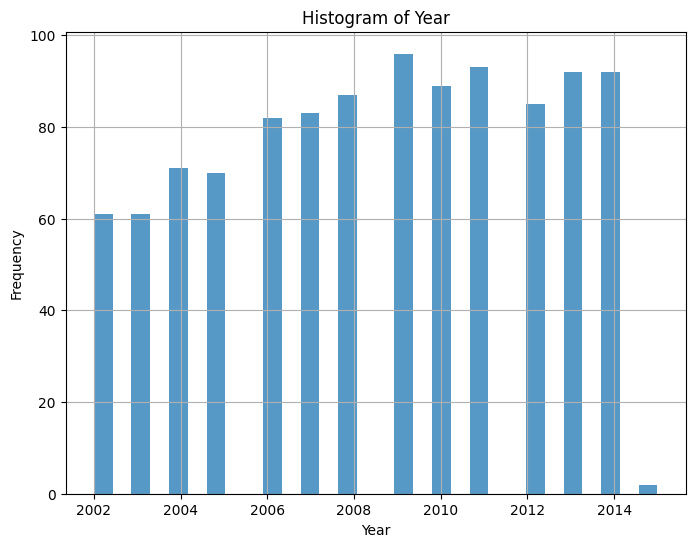

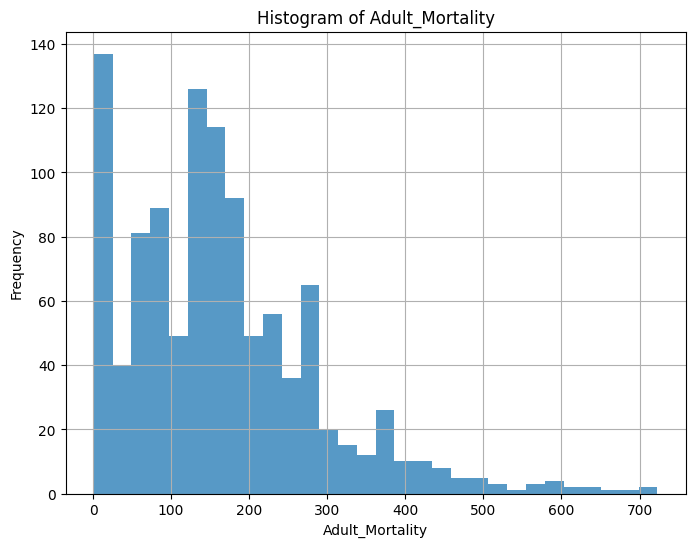

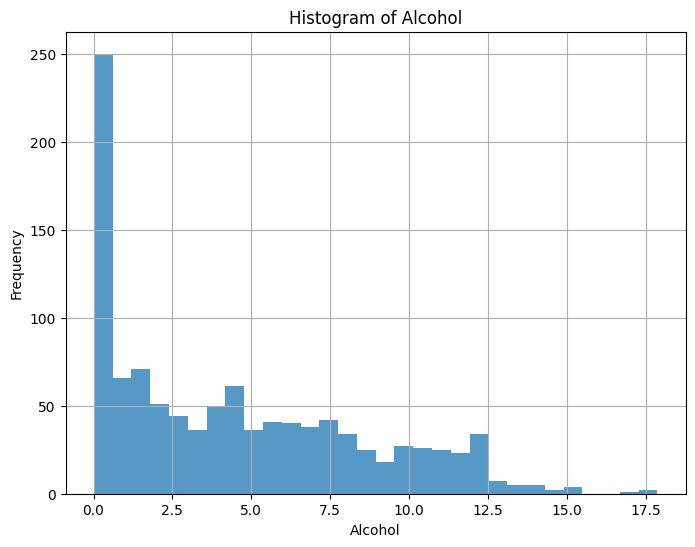

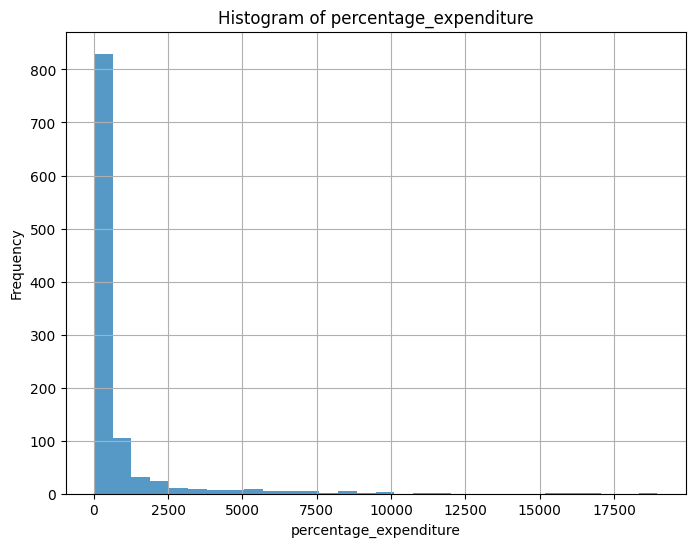

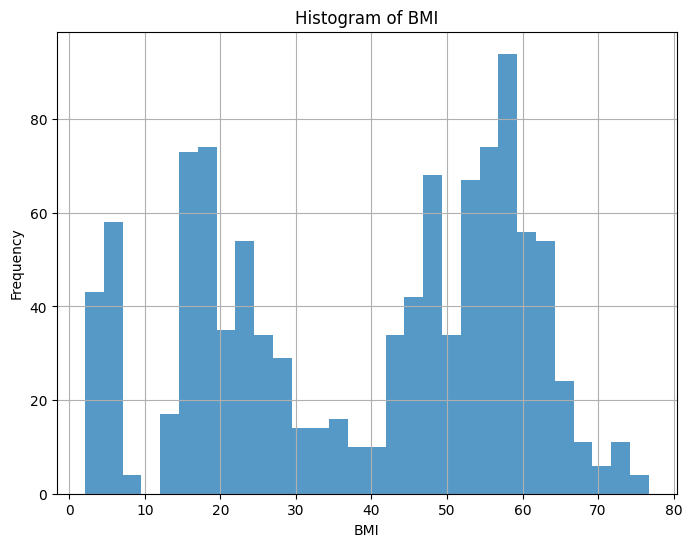

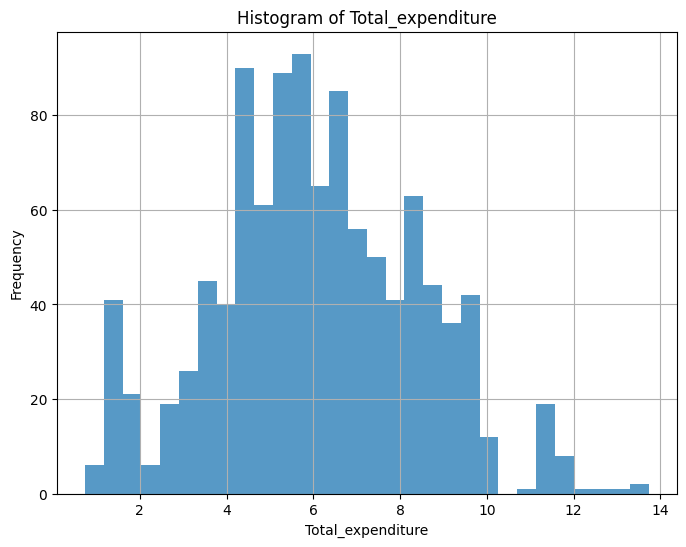

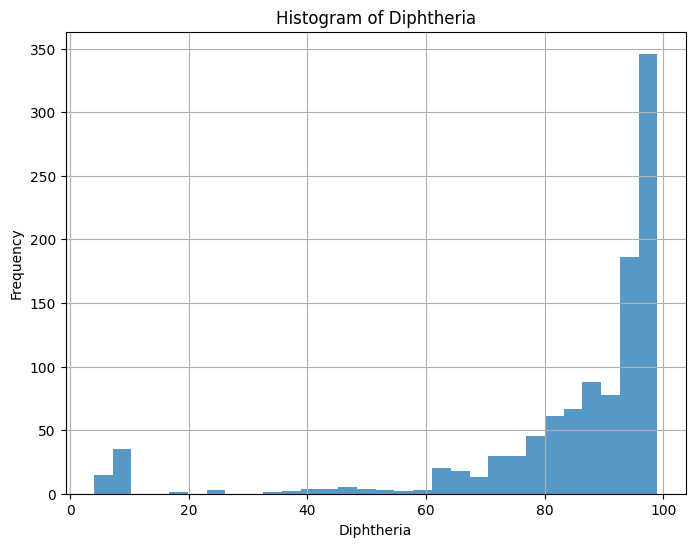

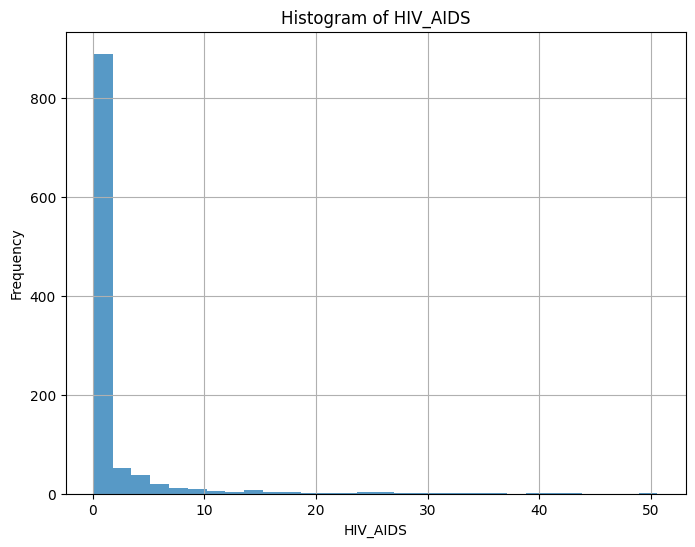

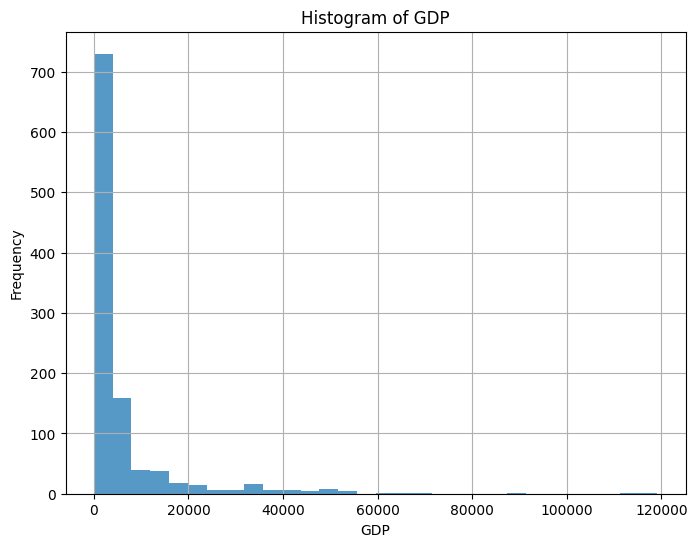

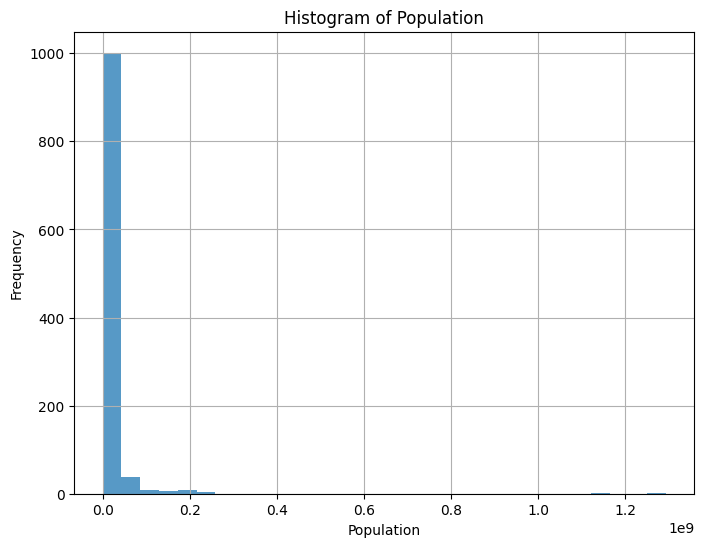

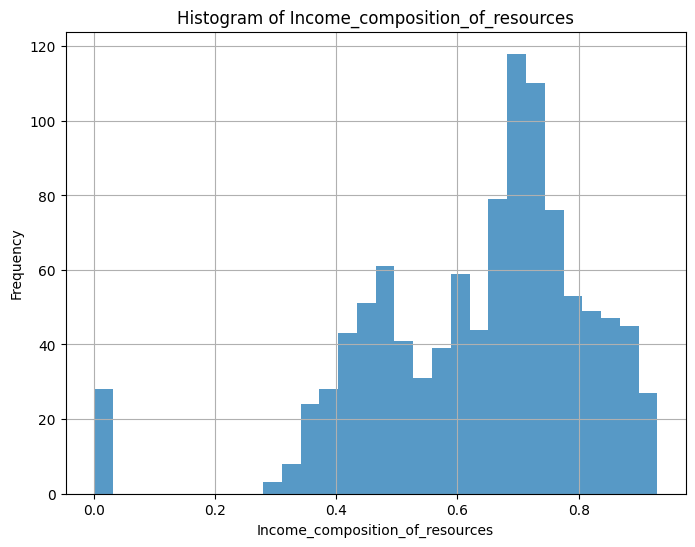

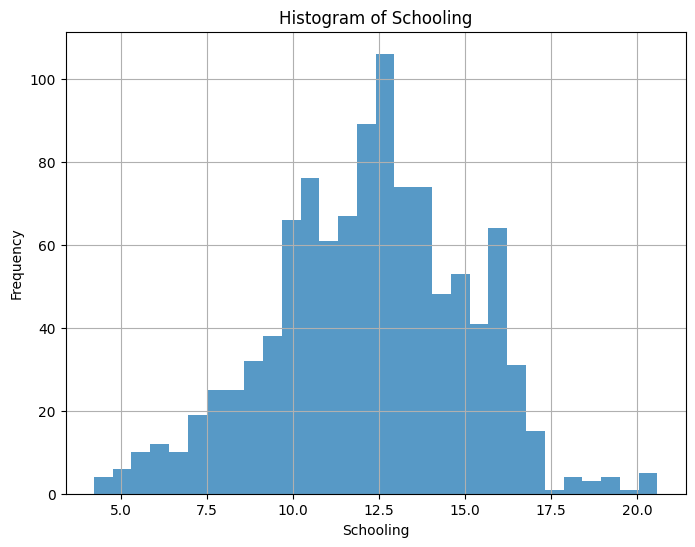

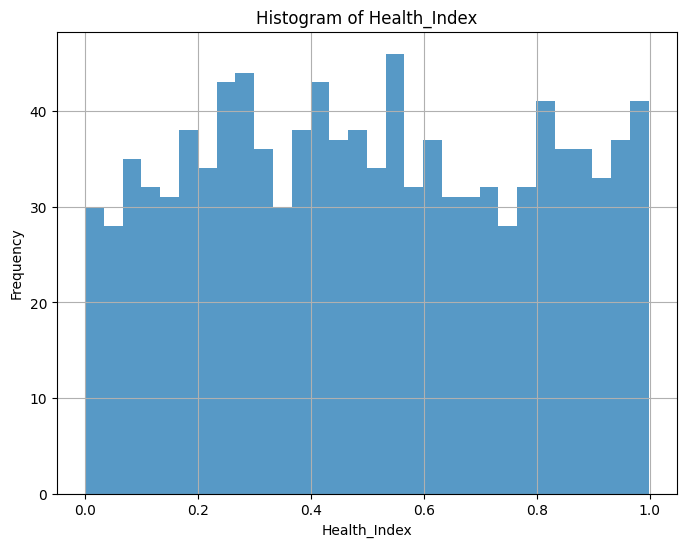

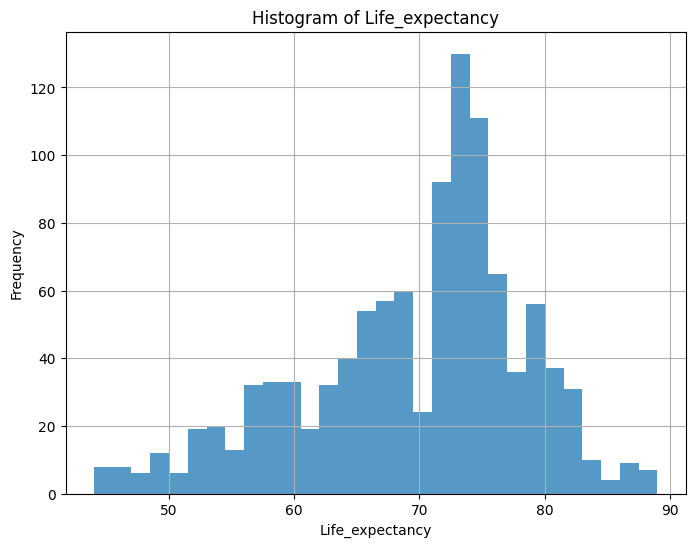

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###

# Selecting only numerical columns (excluding 'Status')
numerical_columns = df.drop(columns=['Status'])

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, alpha=0.75)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()


##### Q1. What can you infer from the histograms? <br/>
**Answer:** <br>
We can understand the relationship of each paramenters or features effects on life expentancy, graph shows the relationship functionality.

*Life expectancy* has normal disturbution, a bit skewed to the left. <br>
We have a bunch set of variables distributed normally and skewed to the right: *Alcohol, Adult Mortality, Perc. Expenditure, GDP, Population and HIV Aids*
Also, there are some of them, skewed to the left, including *Diphteria, Income composition of resources, Income composition of recources (less skewed)*

*BMI* has also normal distribution, but with two peaks - Bimodal distribution

*Schooling and Total* expenditure are normal and do not exibit andy skewness, while the remaining - *Year and Health index* have uniform dist.  


Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

<ipython-input-6-53cfcbdc564e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Correlation of Life_expectancy with other features:
Life_expectancy                    1.000000
Income_composition_of_resources    0.756515
Schooling                          0.755132
BMI                                0.557677
GDP                                0.445212
Alcohol                            0.439279
percentage_expenditure             0.412576
Diphtheria                         0.366748
Total_expenditure                  0.211976
Year                               0.070097
Health_Index                       0.048112
Population                        -0.009788
HIV_AIDS                          -0.588284
Adult_Mortality                   -0.698473
Name: Life_expectancy, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

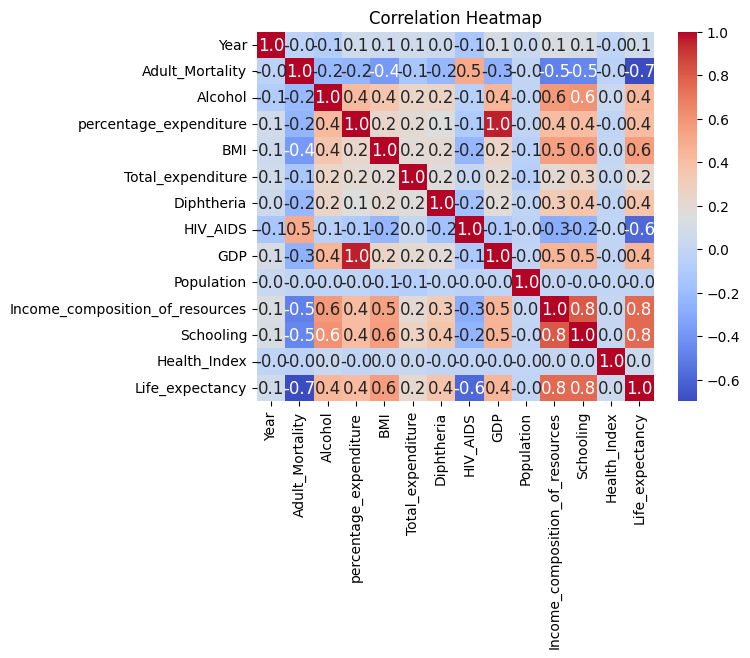

In [ ]:
# Obtaining correlation matrix

correlation_matrix = df.corr()
# print(correlation_matrix)
# Correlation of 'Life_expectancy' with other features
life_expectancy_corr = correlation_matrix['Life_expectancy'].sort_values(ascending=False)

print("Correlation of Life_expectancy with other features:")
print(life_expectancy_corr)

# correlation_matrix_np = correlation_matrix.to_numpy()
# print(correlation_matrix_np)


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 12})
plt.title('Correlation Heatmap')

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
**Answer:** In a correlation matrix, the diagonal consists of 1's because it represents the correlation of a variable with itself, which will always be perfect and equal to 1. This is because when you calculate the correlation of a variable with itself, you're essentially comparing the variable to itself, resulting in a perfect positive correlation (since the variable perfectly matches with itself).

Hence, the diagonal of a correlation matrix will always contain 1's as it represents the correlation of each variable with itself. The off-diagonal elements show the correlations between different pairs of variables in the dataset.

##### Q3. Why is the matrix symmetric along diagonal?<br/>
**Answer:** When you compute the correlation between variable A and variable B, it will give you the same result as when you compute the correlation between variable B and variable A. This property holds because the correlation coefficient measures the strength and direction of the linear relationship between two variables, regardless of which variable is considered the independent or dependent variable.

For instance, if you compute the correlation between 'Variable A' and 'Variable B', you'll get the same value as when you compute the correlation between 'Variable B' and 'Variable A'. This symmetry results in a symmetric correlation matrix, where the values above and below the diagonal are mirror images of each other.

This symmetry is inherent in the definition of correlation and is a fundamental property of the relationship between variables. Therefore, in a correlation matrix, the values above the diagonal are the same as the values below the diagonal, reflecting the symmetry in the relationships between variables.

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
**Answer:** In this case, 'Income_composition_of_resources' and 'Schooling' have the highest correlation values with 'Life_expectancy' (0.756515 and 0.755132 respectively).

Both 'Income_composition_of_resources' and 'Schooling' have strong positive correlations with 'Life_expectancy'. However, when deciding between the two, it's essential to consider the nature of these variables and their relationship with life expectancy.

'Income_composition_of_resources' typically represents the share of income derived from different sources within a country and often correlates with the quality of life, access to healthcare, education, and other factors that impact life expectancy.

'Schooling' often relates to the education level within a population, which can also significantly impact health awareness, access to better healthcare facilities, and healthier lifestyle choices.

Given their high correlations , it direct or indirect influence on life expectancy, either 'Income_composition_of_resources' or 'Schooling' could be a reasonable choice as a predictor in a simple linear regression model

##### Q4.1. Is there any variable that does not make sense to you and why? <br/>
**Answer:** A correlation between 'Population' and 'Life_expectancy', 'Health index' and 'Life_expectancy' might seem doesn't make sense as it is close zero, proves that no leniar relationship extist between them.

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization.

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set.

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving LifeExpectancy_test_modified.csv to LifeExpectancy_test_modified.csv


In [ ]:
# Load the test set "LifeExpectancy_test_modified.csv"
### WRITE CODE ###
df_test = pd.read_csv("LifeExpectancy_test_modified.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###

features_norm = df.drop(["Year", "Status"], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using Z-score normalization
normalized_features = scaler.fit_transform(features_norm)

# Create a new DataFrame with the normalized features (training data)
df_normalized = pd.DataFrame(normalized_features, columns=features_norm.columns)

#test data norm:  dropping year/status
features_norm_test = df_test.drop(["Year", "Status"], axis=1)

# Z-score normalization on test set
normalise_test_features = scaler.fit_transform(features_norm_test)

df_normalized_test = pd.DataFrame(normalise_test_features, columns=features_norm_test.columns)

#printing the normalised for
print(df_normalized.head())

   Adult_Mortality   Alcohol  percentage_expenditure       BMI  \
0        -0.595190 -0.726456                0.048715  1.255572   
1        -0.109184  0.481078                0.023969 -0.320769   
2        -0.801125  1.830823               -0.351900  0.886429   
3        -0.249220 -1.115662               -0.399797  1.051047   
4         0.220312  0.361323               -0.385773 -1.827272   

   Total_expenditure  Diphtheria  HIV_AIDS       GDP  Population  \
0           0.445559   -0.171244 -0.313881  0.227204   -0.139413   
1          -0.831846    0.692054 -0.313881 -0.000131    0.925595   
2           2.157283    0.500210 -0.313881 -0.438595   -0.074490   
3          -0.214434    0.452249 -0.313881 -0.482745   -0.182618   
4          -1.010683    0.548171 -0.201351 -0.459608   -0.107964   

   Income_composition_of_resources  Schooling  Health_Index  Life_expectancy  
0                         0.671470   0.356420     -0.096784         0.615439  
1                         0.556023  

##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
**Answer:**  
Advantages: scales to unit variance, centers data around zero mean, guarantees uniform scale among features, makes interpretation easier, effectively detects outliers.
Disadvantages: prone to anomalies, assumes a normal distribution, units might become less interpretable, not resistant to high values

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
**Answer:** Z-score normalization is helpful in this dataset which has features with different scales (percentage & numeric). It preserves scale consistency among various features, in this datasets which has GDP, Expenditure and no of HIV have higher range so z score normalisation is needed in this dataset.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [ ]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###

from sklearn.preprocessing import OneHotEncoder

### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the specified columns
encoded_cols = encoder.fit_transform(df[['Year', 'Status']])

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Year', 'Status']))], axis=1)

# Drop the original categorical columns
df_encoded.drop(['Year', 'Status'], axis=1, inplace=True)

# Print the shape of the encoded DataFrame
print(df_encoded.shape)

(1064, 27)


Q7. What are the other types of encodings and why did we use One-hot encoding for "Year" and "Status"?

**Answer:**
Other types of encodings include Label Encoding and Ordinal Encoding. One-hot encoding was used for "Year" and "Status" because these categorical variables are not ordinal.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [ ]:
### Bulding and fitting the Multiple Linear Regression model###
file_name = 'LifeExpectancy_training_modified.csv'
df = pd.read_csv(file_name)
# Separating the target variable and features
X = df.drop(['Life_expectancy', 'Year'], axis=1)
Y = df['Life_expectancy']
print(X.head())

       Status  Adult_Mortality  Alcohol  percentage_expenditure   BMI  \
0  Developing               93     1.57              835.062683  64.0   
1  Developing              152     6.41              789.077295  32.4   
2   Developed               68    11.82               90.585012  56.6   
3   Developed              135     0.01                1.576409  59.9   
4  Developing              192     5.93               27.638103   2.2   

   Total_expenditure  Diphtheria  HIV_AIDS         GDP  Population  \
0               7.12          81       0.1  8734.96530   4588368.0   
1               4.12          99       0.1  5941.84710  68416772.0   
2              11.14          95       0.1   554.71532   8479375.0   
3               5.57          94       0.1    12.27733   1998979.0   
4               3.70          96       0.7   296.54617   6473164.0   

   Income_composition_of_resources  Schooling  Health_Index  
0                            0.758       13.2      0.475880  
1               

In [ ]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the specified columns
encoded_cols = encoder.fit_transform(X[['Status']])

# Concatenate the encoded columns with the training DataFrame
X_encoded = pd.concat([X, pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Status']))], axis=1)

# Drop the original categorical columns
X_encoded.drop(['Status'], axis=1, inplace=True)

# Print the shape of the encoded DataFrame
print(X_encoded.shape)

(1064, 14)


In [ ]:
X_encoded.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Health_Index,Status_Developed,Status_Developing
0,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,0.475880,0.0,1.0
1,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,0.203275,0.0,1.0
2,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,0.913847,1.0,0.0
3,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,0.275401,1.0,0.0
4,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,0.400974,0.0,1.0


In [ ]:
# Checking for null values
X_encoded.isnull().sum()

Adult_Mortality                    0
Alcohol                            0
percentage_expenditure             0
BMI                                0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
Income_composition_of_resources    0
Schooling                          0
Health_Index                       0
Status_Developed                   0
Status_Developing                  0
dtype: int64

In [ ]:
# Creating Multiple Linear Regression Model and fitting to the Training Dataset
model = LinearRegression()

In [ ]:
model.fit(X_encoded, Y)

LinearRegression()

In [ ]:
Y_prediction = model.predict(X_encoded)

In [ ]:
X = sm.add_constant(X_encoded)

model_initial = sm.OLS(Y, X).fit()

aic = model_initial.aic
bic = model_initial.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 5782.647028536061
BIC: 5852.224097914684


In [ ]:
print(model_initial.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     404.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:44:44   Log-Likelihood:                -2877.3
No. Observations:                1064   AIC:                             5783.
Df Residuals:                    1050   BIC:                             5852.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
### Evaluate the Linear Regression model by computing MSE on the training set###
print(f'Mean Squared Error (MSE) on Training Set: {mean_squared_error(Y, Y_prediction)}')

Mean Squared Error (MSE) on Training Set: 13.074003330845038


Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [ ]:
coefficients = pd.Series(model.coef_, index=X_encoded.columns)
print('Coefficients:')
print('Intercept:', model.intercept_)
print(coefficients)

Coefficients:
Intercept: 50.77867699940914
Adult_Mortality                   -1.726938e-02
Alcohol                           -8.422124e-02
percentage_expenditure             4.009877e-04
BMI                                3.600683e-02
Total_expenditure                  9.309270e-02
Diphtheria                         2.382734e-02
HIV_AIDS                          -4.896151e-01
GDP                               -1.920604e-06
Population                        -1.104177e-09
Income_composition_of_resources    1.140504e+01
Schooling                          9.138672e-01
Health_Index                       8.767061e-01
Status_Developed                   3.262488e-01
Status_Developing                 -3.262488e-01
dtype: float64


In [ ]:
sorted_coefficients = coefficients.abs().sort_values()

print('Coefficients:')
print('Intercept:', model.intercept_)

print(sorted_coefficients)

Coefficients:
Intercept: 50.77867699940914
Population                         1.104177e-09
GDP                                1.920604e-06
percentage_expenditure             4.009877e-04
Adult_Mortality                    1.726938e-02
Diphtheria                         2.382734e-02
BMI                                3.600683e-02
Alcohol                            8.422124e-02
Total_expenditure                  9.309270e-02
Status_Developing                  3.262488e-01
Status_Developed                   3.262488e-01
HIV_AIDS                           4.896151e-01
Health_Index                       8.767061e-01
Schooling                          9.138672e-01
Income_composition_of_resources    1.140504e+01
dtype: float64


Q9. Is there a problem of multicolinearity? Explain what you can do?

**Answer:** From the correlation matrix, it can be noted that multicollinearity is observed between some of the features (independent variables) in the data, particularly 'percentage_expenditure', and 'GDP'.
'Income_composition_of_resources' and 'Schooling' also exhibit high correlation.

There are several approaches to dealing with multicollinearity in the data: (1) feature selection - dropping correlated variables one by another, and measuring the effect on performance metrics, (2) remove all highly correllated variables together, again checking for the Hypothesis that their coefficients are insignificant (F-test with restrictions) and/or (3) apply regularization.

In [ ]:
filtered_values = correlation_matrix[correlation_matrix > 0.8]
print(filtered_values)

                                 Year  Adult_Mortality  Alcohol  \
Year                              1.0              NaN      NaN   
Adult_Mortality                   NaN              1.0      NaN   
Alcohol                           NaN              NaN      1.0   
percentage_expenditure            NaN              NaN      NaN   
BMI                               NaN              NaN      NaN   
Total_expenditure                 NaN              NaN      NaN   
Diphtheria                        NaN              NaN      NaN   
HIV_AIDS                          NaN              NaN      NaN   
GDP                               NaN              NaN      NaN   
Population                        NaN              NaN      NaN   
Income_composition_of_resources   NaN              NaN      NaN   
Schooling                         NaN              NaN      NaN   
Health_Index                      NaN              NaN      NaN   
Life_expectancy                   NaN              NaN      Na

Variables "GDP" and "percentage_expenditure" are highly correlated, with corr(X1, X2) = 0.956792 <br>
Other variables with high correation are "Income_composition_of_resources" and "Schooling", with corr(X1, X2) = 0.806302. <br>
"Income_composition_of_resources" and "Schooling" have higher correlation with the target variable, and, consequently, "GDP" and "percentage_expenditure" will be removed before. Moreover, "GDP" and "percentage_expenditure" have lower coefficients (less significant impact on the target), as we have enough evidence to assume that there exists perfect multicollinearity. <br> From the t-statistics of features (measured by respective p-values), we can see that features "GDP" and "Population" are statistically insignificant. <br>
Moreover, as dataset contains other variables on expenditure, the "percentage_expenditure" will be removed first.

In [ ]:
X1 = X_encoded.drop(['Population', 'percentage_expenditure'], axis=1)

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X1, Y)

LinearRegression()

In [ ]:
Y1_prediction = model1.predict(X1)

In [ ]:
X1 = sm.add_constant(X1)

model1 = sm.OLS(Y, X1).fit()

aic1 = model1.aic
bic1 = model1.bic

print(f"AIC: {aic1}")
print(f"BIC: {bic1}")

AIC: 5782.723198244561
BIC: 5842.36068628338


In [ ]:
print(f'Mean Squared Error (MSE) on Initial Model: {mean_squared_error(Y, Y_prediction):.2f}')
print(f'Mean Squared Error (MSE) of Model 1: {mean_squared_error(Y, Y1_prediction):.2f}')

Mean Squared Error (MSE) on Initial Model: 13.07
Mean Squared Error (MSE) of Model 1: 13.12


In [ ]:
X2 = X_encoded.drop(['Population', 'GDP', 'percentage_expenditure'], axis=1)

In [ ]:
model2 = LinearRegression()
model2.fit(X2, Y)

LinearRegression()

In [ ]:
Y2_prediction = model2.predict(X2)

In [ ]:
X2 = sm.add_constant(X2)

model2 = sm.OLS(Y, X2).fit()

aic2 = model2.aic
bic2 = model2.bic

print(f"AIC: {aic2}")
print(f"BIC: {bic2}")


AIC: 5807.3982783913325
BIC: 5862.06597576025


In [ ]:
print(f'Mean Squared Error (MSE) on Initial Model: {mean_squared_error(Y, Y_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 1: {mean_squared_error(Y, Y1_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 2: {mean_squared_error(Y, Y2_prediction):.4f}')

Mean Squared Error (MSE) on Initial Model: 13.0740
Mean Squared Error (MSE) of Model 1: 13.1242
Mean Squared Error (MSE) of Model 2: 13.4574


In [ ]:
X3 = X_encoded.drop(['Population', 'Schooling', 'GDP', 'percentage_expenditure'], axis=1)

In [ ]:
model3 = LinearRegression()
model3.fit(X3, Y)

LinearRegression()

In [ ]:
Y3_prediction = model3.predict(X3)

In [ ]:
X3 = sm.add_constant(X3)

model3 = sm.OLS(Y, X3).fit()

aic3 = model3.aic
bic3 = model3.bic

print(f"AIC: {aic3}")
print(f"BIC: {bic3}")

AIC: 5950.438165137945
BIC: 6000.1360718369615


In [ ]:
print(f'Mean Squared Error (MSE) on Initial Model: {mean_squared_error(Y, Y_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 1: {mean_squared_error(Y, Y1_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 2: {mean_squared_error(Y, Y2_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 3: {mean_squared_error(Y, Y3_prediction):.4f}')

Mean Squared Error (MSE) on Initial Model: 13.0740
Mean Squared Error (MSE) of Model 1: 13.1242
Mean Squared Error (MSE) of Model 2: 13.4574
Mean Squared Error (MSE) of Model 3: 15.4227


In [ ]:
X4 = X_encoded.drop(['Population', 'Income_composition_of_resources', 'Schooling', 'GDP', 'percentage_expenditure'], axis=1)

In [ ]:
model4 = LinearRegression()
model4.fit(X4, Y)

LinearRegression()

In [ ]:
Y4_prediction = model4.predict(X4)

In [ ]:
X4 = sm.add_constant(X4)

model = sm.OLS(Y, X4).fit()

aic4 = model.aic
bic4 = model.bic

print(f"AIC: {aic4}")
print(f"BIC: {bic4}")

AIC: 6287.195635800698
BIC: 6331.923751829812


In [ ]:
print(f'Mean Squared Error (MSE) on Initial Model: {mean_squared_error(Y, Y_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 1: {mean_squared_error(Y, Y1_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 2: {mean_squared_error(Y, Y2_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 3: {mean_squared_error(Y, Y3_prediction):.4f}')
print(f'Mean Squared Error (MSE) of Model 4: {mean_squared_error(Y, Y4_prediction):.4f}')

Mean Squared Error (MSE) on Initial Model: 13.0740
Mean Squared Error (MSE) of Model 1: 13.1242
Mean Squared Error (MSE) of Model 2: 13.4574
Mean Squared Error (MSE) of Model 3: 15.4227
Mean Squared Error (MSE) of Model 4: 21.2047


**Conclusion** After selecting and removing the features with high multicollinearity and least predicting power, as measured by coefficients, we can see that the model accuracy does not improve (measured by AIC/BIC and MSE). <br>
We will further continue our analysis with Model 2 - which excluded variables with least significance to the predictor ('Population' and 'GDP) and removes highly correlated variables ('GDP' and 'percentage_expenditure').

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation.

Fill in the code for calculation of R2 score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
file_name = 'LifeExpectancy_training_modified.csv'
data = pd.read_csv(file_name)

X = data[['Schooling']]
Y = data['Life_expectancy']

model = LinearRegression()
model.fit(X, Y)

predictions = model.predict(X)
r2 = r2_score(Y, predictions)

# Print R2 score
print(f"R^2 Score for model with 'Schooling': {r2*100:.3f}%")

R^2 Score for model with 'Schooling': 57.022%


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
# Define your predictors and outcome
X = data[['Schooling', 'Adult_Mortality']]
Y = data['Life_expectancy']

model.fit(X, Y)

predictions = model.predict(X)
r2 = r2_score(Y, predictions)

# Print R2 score
print(f"R^2 Score for model with 'Schooling', 'Adult_Mortality': {r2*100:.3f}%")

R^2 Score for model with 'Schooling', 'Adult_Mortality': 72.483%


$R^2$ for model with "Schooling", "Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X = data[['Schooling', 'Adult_Mortality', 'Population']]
Y = data['Life_expectancy']

# Fit the model
model.fit(X, Y)

predictions = model.predict(X)
r2 = r2_score(Y, predictions)

# Print R2 score
print(f"R^2 Score for model with 'Schooling', 'Adult_Mortality', 'Population': {r2*100:.3f}%")

R^2 Score for model with 'Schooling', 'Adult_Mortality', 'Population': 72.485%


You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-p-1)}$<br/>
where:<br/>
n = number of samples<br/>
p = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
def adjusted_r2_score(model, X, Y):
    """
    Calculate the adjusted R^2 score.

    :param model: The trained regression model.
    :param X: The predictor variables.
    :param y: The target variable.
    :return: The adjusted R^2 score.
    """
    r2 = model.score(X, Y)
    n = len(Y)
    k = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adjusted_r2


In [ ]:
X = data[['Schooling']]
Y = data['Life_expectancy']
model = LinearRegression()
model.fit(X, Y)

adjusted_r2 = adjusted_r2_score(model, X, Y)


# Print Adjusted R2 score
print(f"Adjusted R^2 Score for model with 'Schooling': {adjusted_r2*100:.3f}%")

Adjusted R^2 Score for model with 'Schooling': 56.982%


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
### WRITE CODE ###
X = data[['Schooling', 'Adult_Mortality']]
model.fit(X, Y)

adjusted_r2 = adjusted_r2_score(model, X, Y)


# Print Adjusted R2 score
print(f"Adjusted R^2 Score for model with 'Schooling', 'Adult_Mortality': {adjusted_r2*100:.3f}%")

Adjusted R^2 Score for model with 'Schooling', 'Adult_Mortality': 72.431%


Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X = data[['Schooling', 'Adult_Mortality', 'Population']]
model.fit(X, Y)

adjusted_r2 = adjusted_r2_score(model, X, Y)


# Print Adjusted R2 score
print(f"Adjusted R^2 Score for model with 'Schooling', 'Adult_Mortality', 'Population': {adjusted_r2*100:.3f}%")

Adjusted R^2 Score for model with 'Schooling', 'Adult_Mortality', 'Population': 72.407%


Below we calculate adjusted R^2 for out selected model.

In [ ]:
model2 = LinearRegression()
model2.fit(X2, Y)
adj_R_model2 = adjusted_r2_score(model2, X2, Y)
print(f"Adjusted R^2 Score for our model: {adj_R_model2*100:.3f}%")

Adjusted R^2 Score for our model: 82.685%


### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [ ]:
# Design a function to implement 5-fold cross-validation.
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

def cross_val_mse(X, y, f):
    kf = KFold(n_splits=f, shuffle=True, random_state=42)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))

    average_mse = np.mean(mse_scores)
    return average_mse

In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE
from itertools import combinations
### Write code here ###
def find_best_feature_combination(X, y, f):
    min_avg_mse = float('inf')
    best_feature_combination = None
    for num_features in range(1, len(X.columns) + 1):
        for features in combinations(X.columns, num_features):
            avg_mse = cross_val_mse(X[list(features)], y, f)
            if avg_mse < min_avg_mse:
                print(f"Average MSE: {avg_mse} with features: {features}")
                min_avg_mse = avg_mse
                best_feature_combination = features
    return best_feature_combination, min_avg_mse


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from itertools import combinations

# Load training data
train_df = pd.read_csv('LifeExpectancy_training_modified.csv')

# Extract features and target
X = train_df.drop(['Life_expectancy'], axis=1)
y = train_df['Life_expectancy']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Status'], drop_first=True)

# Design a function to implement 5-fold cross-validation.
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y, f):
    kf = KFold(n_splits=f, shuffle=True, random_state=42)
    mse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))

    average_mse = np.mean(mse_scores)
    return average_mse

# By using your above functions, find the best combination of features, which has the lowest averaged MSE

def find_best_feature_combination(X, y, f):
    min_avg_mse = float('inf')
    best_feature_combination = None
    for num_features in range(1, len(X.columns) + 1):
        for features in combinations(X.columns, num_features):
            avg_mse = cross_val_mse(X[list(features)], y, f)
            if avg_mse < min_avg_mse:
                print(f"Average MSE: {avg_mse} with features: {features}")
                min_avg_mse = avg_mse
                best_feature_combination = features
    return best_feature_combination, min_avg_mse

# Print the best features and the corresponding MSE using the training set
best_features, best_mse = find_best_feature_combination(X_encoded, y, 5)
print("Best feature combination:", best_features)
print("Corresponding MSE:", best_mse)


Average MSE: 78.70658066516293 with features: ('Year',)
Average MSE: 40.38542643167671 with features: ('Adult_Mortality',)
Average MSE: 34.218891785254584 with features: ('Income_composition_of_resources',)
Average MSE: 33.89507815732628 with features: ('Schooling',)
Average MSE: 33.67763719735072 with features: ('Adult_Mortality', 'Alcohol')
Average MSE: 32.452906501581865 with features: ('Adult_Mortality', 'BMI')
Average MSE: 22.60952537617545 with features: ('Adult_Mortality', 'Income_composition_of_resources')
Average MSE: 21.746013197927777 with features: ('Adult_Mortality', 'Schooling')
Average MSE: 20.301074402433613 with features: ('HIV_AIDS', 'Schooling')
Average MSE: 20.00892754138564 with features: ('Year', 'HIV_AIDS', 'Schooling')
Average MSE: 17.749689265584447 with features: ('Adult_Mortality', 'HIV_AIDS', 'Income_composition_of_resources')
Average MSE: 16.15358595687632 with features: ('Adult_Mortality', 'HIV_AIDS', 'Schooling')
Average MSE: 16.005740228389264 with featu

In [ ]:
# Print the best features and the corresponding mse
### WRITE CODE ###
print("Best feature combination:", best_features)
print("Corresponding MSE:", best_mse)

Best feature combination: ('Year', 'Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling', 'Health_Index', 'Status_Developing')
Corresponding MSE: 13.073277390701685


### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test_modified.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [ ]:
# Load training data
train_df = pd.read_csv('LifeExpectancy_training_modified.csv')

# One-hot encode categorical variables in training data
encoder = OneHotEncoder(sparse_output=False)
encoded_cols_train = encoder.fit_transform(train_df[['Status']])
train_df_encoded = pd.concat([train_df, pd.DataFrame(encoded_cols_train, columns=encoder.get_feature_names_out(['Status']))], axis=1)
train_df_encoded.drop(['Status'], axis=1, inplace=True)

# Normalize specific columns in training data
columns_to_normalize = ['HIV_AIDS', 'Diphtheria', 'Alcohol', 'Adult_Mortality']
scaler = StandardScaler()
train_df_encoded[columns_to_normalize] = scaler.fit_transform(train_df_encoded[columns_to_normalize])

# Prepare features and target for model training
X_train = train_df_encoded.drop(['Population', 'GDP', 'percentage_expenditure', 'Life_expectancy'], axis=1)
Y_train = train_df['Life_expectancy']
X_train = sm.add_constant(X_train)

# Train the model
model = sm.OLS(Y_train, X_train).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     473.8
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:54:09   Log-Likelihood:                -2882.5
No. Observations:                1064   AIC:                             5789.
Df Residuals:                    1052   BIC:                             5849.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# Load test data
test_df = pd.read_csv('LifeExpectancy_test_modified.csv')

# Apply one-hot encoding to test data using the fitted encoder
encoded_cols_test = encoder.transform(test_df[['Status']])
test_df_encoded = pd.concat([test_df, pd.DataFrame(encoded_cols_test,
                                                   columns=encoder.get_feature_names_out(['Status']))], axis=1)
test_df_encoded.drop(['Status'], axis=1, inplace=True)

# Apply normalization to test data using the fitted scaler
test_df_encoded[columns_to_normalize] = scaler.transform(test_df_encoded[columns_to_normalize])

# Prepare test features
X_test = test_df_encoded.drop(['Population', 'GDP', 'percentage_expenditure'], axis=1)
X_test = sm.add_constant(X_test)

# Make predictions
y_pred = model.predict(X_test)

# Output predictions
print(y_pred)

0      61.414632
1      60.378624
2      72.071493
3      71.234038
4      71.087999
         ...    
453    61.205604
454    50.527537
455    49.709547
456    44.783718
457    38.324829
Length: 458, dtype: float64


**Summary**
We trained the data and developed an optimal model which included statistical transformations (encoding categorical variable, and normalizing highly skewed variables) and selecting features that are not perfectly correlated, are significant and have high impact on predicting target variable, i.e. high coefficients. The model was then employed to perform multiple linear regression analysis on the test dataset. <br>
In addition, we performed K-fold analysis, however, we did not used all the variables as it was stated in spite of the fact that MSE was minimum. The reasons are low value of coefficient (close to 0) and high t-stat p-value. <br>
The careful selection and refinement of the model, guided by reference statistics from the training phase, ensured a robust framework for making predictions on new, untrained data in the test set. This approach underscores the effective utilization of training data insights to build a model with strong generalization capabilities, subsequently applied to the test data for regression analysis.